Data Collection: 16 Milion tweets Datasets have been used

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to  fetch the dataset from kaggle
!kaggle datasets download -d kazanova/sentiment140

 94% 76.0M/80.9M [00:02<00:00, 36.9MB/s]
100% 80.9M/80.9M [00:02<00:00, 31.9MB/s]


In [ ]:
# extracting a compressed datasets from zipfile

from zipfile import ZipFile
dataset = '/content/sentiment140.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The datasets extracted')

The datasets extracted


In [ ]:
# loading the data from CSV file to Pandas dataframe
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1', header = None )

In [ ]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Feature Engineering


In [ ]:
columns = df.columns
print(columns)

Index([0, 1, 2, 3, 4, 5], dtype='int64')


In [ ]:
df.drop([1,2,3,4],axis=1,inplace=True)
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.columns=['sentiment','data']
df.head()

,sentiment,data
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
 y = df['sentiment']
 print(y)

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: sentiment, Length: 1600000, dtype: int64


Splitting the datatset in train and test split

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test = train_test_split(df['data'], y, test_size=0.33,random_state=42 )
print('DF Train Shape:', df_train.shape)
print('DF Test Shape:', df_test.shape)
print('Y Train Shape:', y_train.shape)
print('Y Test Shape:', y_test.shape)

DF Train Shape: (1072000,)
DF Test Shape: (528000,)
Y Train Shape: (1072000,)
Y Test Shape: (528000,)


Building Deep learning Model

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 10000
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)

Pertraining method used here is word2vec

In [ ]:
word2vec = tokenizer.word_index
V = len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 527470 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train = pad_sequences(sequence_train)
data_train.shape

(1072000, 116)

In [ ]:
T = data_train.shape[1]
data_test = pad_sequences(sequence_test, maxlen = T)
data_test.shape

(528000, 116)

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [ ]:
D = 20
i = Input((T))
x = Embedding(V+1,D)(i)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3,activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3,activation='relu')(x)
x = GlobalMaxPooling1D()(x)
X = Dense(5, activation = 'softmax')(x)
model = Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 embedding (Embedding)       (None, 116, 20)           10549420  
                                                                 
 max_pooling1d (MaxPooling1  (None, 38, 20)            0         
 D)                                                              
                                                                 
 conv1d (Conv1D)             (None, 36, 64)            3904      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 12, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           24704 

Training the Model

In [48]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnn_senti = model.fit(data_train, y_train, validation_data = (data_test, y_test), epochs = 2, batch_size = 100)

Epoch 1/2
10720/10720 [==============================] - 3116s 291ms/step - loss: 0.4798 - accuracy: 0.7689 - val_loss: 0.4863 - val_accuracy: 0.7645
Epoch 2/2
10720/10720 [==============================] - 3051s 285ms/step - loss: 0.4675 - accuracy: 0.7764 - val_loss: 0.4872 - val_accuracy: 0.7648


In [59]:
# Print accuracy and loss for each epoch
for epoch in range(1, 3):
    print(f"Epoch {epoch}/{2}")
    print(f"Train - Loss: {cnn_senti.history['loss'][epoch-1]}, Accuracy: {cnn_senti.history['accuracy'][epoch-1]}")
    print(f"Validation - Loss: {cnn_senti.history['val_loss'][epoch-1]}, Accuracy: {cnn_senti.history['val_accuracy'][epoch-1]}")

Epoch 1/2
Train - Loss: 0.4798077642917633, Accuracy: 0.7689263224601746
Validation - Loss: 0.4863308370113373, Accuracy: 0.7644677758216858
Epoch 2/2
Train - Loss: 0.46753329038619995, Accuracy: 0.7764263153076172
Validation - Loss: 0.48719191551208496, Accuracy: 0.7647556662559509


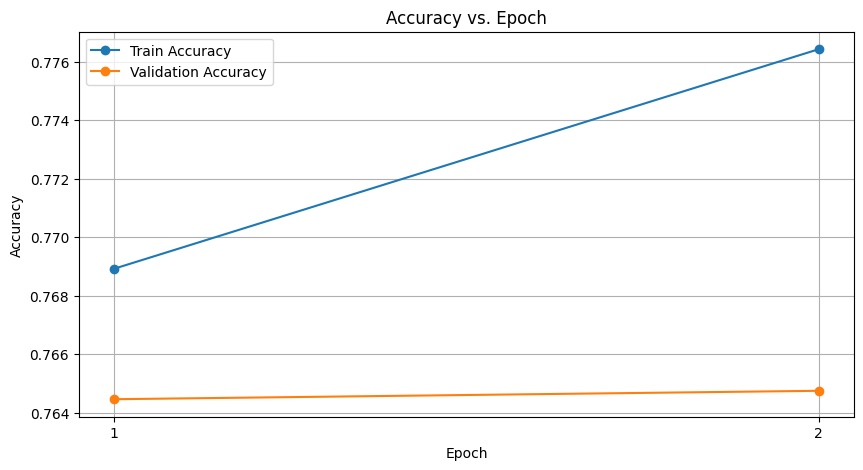

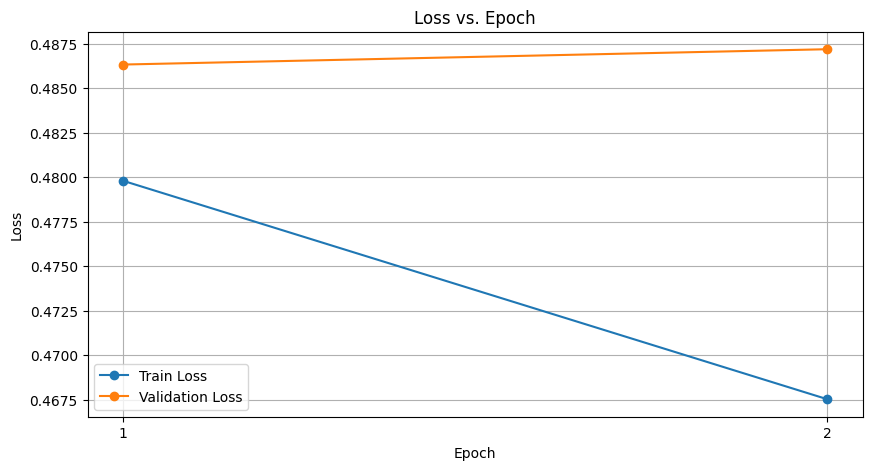

In [61]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values from the history object
train_loss = cnn_senti.history['loss']
train_accuracy = cnn_senti.history['accuracy']
val_loss = cnn_senti.history['val_loss']
val_accuracy = cnn_senti.history['val_accuracy']

# Plot accuracy vs. epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy', marker='o')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(train_accuracy) + 1))
plt.legend()
plt.grid(True)
plt.show()

# Plot loss vs. epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='o')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(train_loss) + 1))
plt.legend()
plt.grid(True)
plt.show()


The epoch used is 2 here, coz the time taking for training he model was going above 5hrs (for  epochs)

In [49]:
y_pred = model.predict(data_test)
y_pred

16500/16500 [==============================] - 53s 3ms/step


array([[0.10677457, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29637414, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4211951 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1451055 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.67323184, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3004977 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [50]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([0, 0, 4, ..., 4, 0, 0])

Scoring

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Text(50.722222222222214, 0.5, 'y_pred')

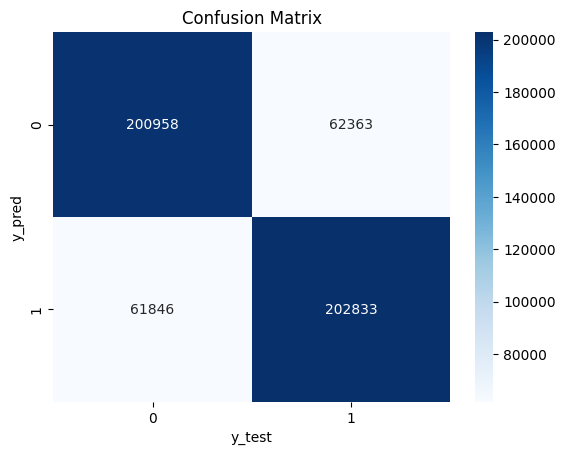

In [52]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm,annot=True,cmap='Blues',fmt='')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76    263321
           4       0.76      0.77      0.77    264679

    accuracy                           0.76    528000
   macro avg       0.76      0.76      0.76    528000
weighted avg       0.76      0.76      0.76    528000

